## Arbol elemental con libreria  rpart

Debe tener instaladas las librerias  data.table  ,  rpart   y rpart.plot

#cargo las librerias que necesito
require("data.table")
require("rpart")
require("rpart.plot")
require("varImp")

Aqui se debe poner la carpeta de SU computadora local

In [2]:
setwd("C:/Users/bbvis/Documents/RG/Master/laboratorio")  #Establezco el Working Directory

cargo el dataset

In [3]:
dataset  <- fread("./datasets/competencia1_2022.csv")[,clase_binaria:=ifelse(clase_ternaria=='CONTINUA','NO','SI')]

defino donde entreno y donde aplico el modelo

In [4]:
dtrain  <- dataset[ foto_mes==202101 ]  #defino donde voy a entrenar
dapply  <- dataset[ foto_mes==202103 ]  #defino donde voy a aplicar el modelo

genero el modelo,  aqui se construye el arbol

In [5]:
modelo  <- rpart(formula=    "clase_binaria ~ . -clase_ternaria", #originalamente estaba la ternaria, #quiero predecir clase_ternaria a partir de el resto de las variables
                 data =      dtrain,  #los datos donde voy a entrenar
                 xval=       0,
                 cp=        -0.3, #esto significa no limitar la complejidad de los splits
                 minsplit= 100,   #minima cantidad de registros para que se haga el split
                 minbucket=  1,   #tamaño minimo de una hoja
                 maxdepth=  10 )  #PRUEBO  una profundidad de 10

Ahora grafico el arbol, va a ser muy frondoso porque la profundidad es de 10

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


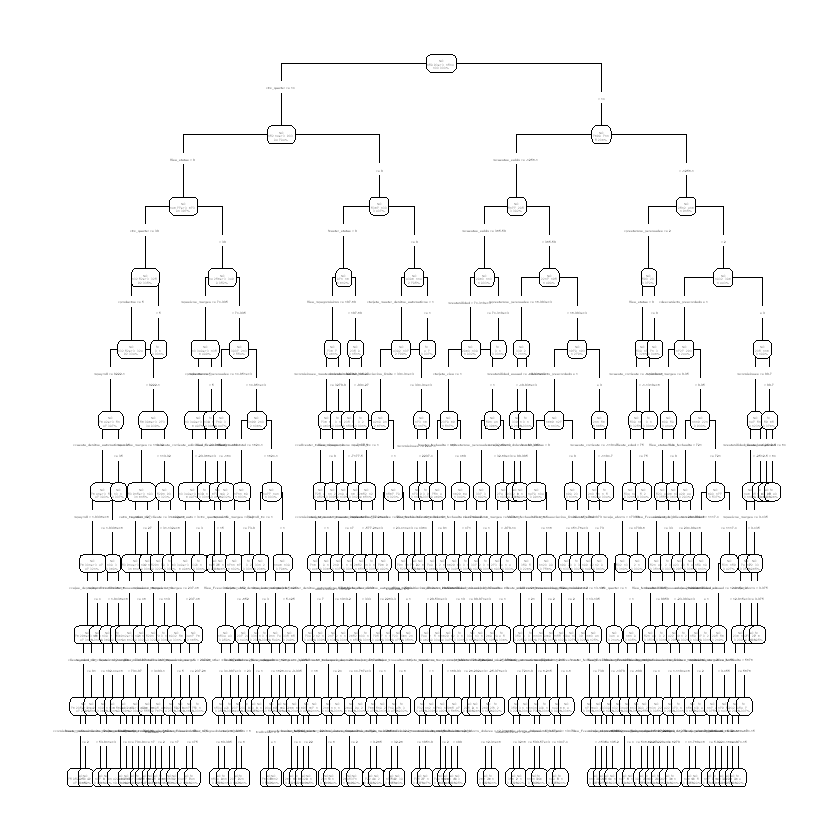

In [6]:
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0)

Ahora aplico al modelo  a los datos muevos  y genero la salida para kaggle

In [20]:
df<- as.data.frame(caret::varImp(modelo))

In [21]:
df$

,Overall
,<dbl>
active_quarter,64.23848619
catm_trx_other,1.96571727
ccaja_ahorro,1.18856113
ccaja_seguridad,3.64531488
ccajas_consultas,26.65930684
ccajas_depositos,3.25636020
ccajas_otras,15.11908104
ccajas_transacciones,27.89533478
ccajeros_propios_descuentos,0.09401875


In [30]:
df_ordenado <- df[order(df$Overall), ]
df_ordenado

[1]   0.00000000   0.00000000   0.00000000   0.00000000   0.00000000
  [6]   0.00000000   0.00000000   0.00000000   0.00000000   0.00000000
 [11]   0.00000000   0.00000000   0.00000000   0.00000000   0.00000000
 [16]   0.00000000   0.00000000   0.00000000   0.00000000   0.00000000
 [21]   0.00000000   0.00000000   0.00000000   0.00000000   0.00000000
 [26]   0.00000000   0.00000000   0.00000000   0.00000000   0.00000000
 [31]   0.00000000   0.00000000   0.00000000   0.00000000   0.00000000
 [36]   0.00000000   0.00000000   0.00000000   0.00000000   0.00000000
 [41]   0.00000000   0.00000000   0.00000000   0.00000000   0.00000000
 [46]   0.00000000   0.00000000   0.00000000   0.00000000   0.06026707
 [51]   0.09401875   0.17918606   0.29340853   0.45541840   0.50887969
 [56]   0.59196974   0.68731422   0.93453247   0.93795021   0.93795021
 [61]   0.96721311   1.04634959   1.09063323   1.12445985   1.18856113
 [66]   1.19245999   1.26770227   1.27363184   1.46485113   1.46485113
 [71]   1.50000000   1.54849016   1.67037849   1.70771981   1.86800329
 [76]   1.86800329   1.96571727   2.14224365   2.42324385   2.91876317
 [81]   3.18806411   3.24006125   3.25636020   3.46529328   3.59375225
 [86]   3.64531488   3.75187354   3.78561868   3.86085737   3.89839281
 [91]   4.21819035   4.43641798   4.53127592   4.93430828   5.32956539
 [96]   5.59372399   6.23986933   6.25121714   6.74737141   7.49154979
[101]   7.52014167   7.67199472   8.60092045   8.71696015   8.76172419
[106]   9.54103884  10.82783037  12.55427179  12.72597144  13.18384296
[111]  14.03245455  14.16200665  15.11908104  15.21289695  15.79916231
[116]  16.98274427  18.60824990  19.95128994  20.82236266  21.08007938
[121]  22.25999720  22.65988409  23.76189253  24.07395106  25.69790732
[126]  26.20293406  26.65930684  26.86809245  27.03000369  27.77334603
[131]  27.89533478  28.10047059  30.30598517  31.00556581  31.70548883
[136]  32.06749361  32.65964240  35.69442286  37.65623654  40.15978870
[141]  43.42112532  44.31042933  46.64249677  50.98475907  51.74167200
[146]  56.74486329  60.75240034  64.23848619  64.88447732  66.29172480
[151]  69.88588558 135.48360421 163.00809983 191.97090508

aplico el modelo a los datos nuevos

In [16]:
prediccion  <- predict( modelo, dapply , type = "prob") #aplico el modelo

prediccion es una matriz con TRES columnas, llamadas "BAJA+1", "BAJA+2"  y "CONTINUA"
cada columna es el vector de probabilidades 

agrego a dapply una columna nueva que es la probabilidad de BAJA+2

dapply[ , prob_baja2 := prediccion[, "BAJA+2"] ]

In [17]:
dapply[ , prob_baja2 := prediccion[, "SI"] ]

solo le envio estimulo a los registros con probabilidad de BAJA+2 mayor  a  1/40

In [20]:
dapply[ , Predicted  := as.numeric(prob_baja2 > 0.025) ]

Finalmente genero el archivo para Kaggle

creo la carpeta donde va el experimento

In [ ]:
dir.create( "./exp/KA2002" ) 

grabo el dataset

In [21]:
fwrite( dapply[ , list(numero_de_cliente, Predicted) ], #solo los campos para Kaggle
        file= "./exp/KA2002/KA2002_003.csv", 
        sep= "," )